# Model selection 2 for other MODIS data

This is where models are fit and fixed and random effects coefficients are exported for mapping.

Best fit models were chosen based on what is here: [MS2_randD.ipynb](MS2_randD.ipynb)

## Load packages and data

In [1]:
library('ggplot2')
library('repr')
library('dplyr')
library('nlme')

source('common_stats_functions.r')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.2.1, November 1st, 2019, [PJ_VERSION: 620]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 


OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


In [2]:
# Get the sensitivity statistics dataframe and
# the long-term USHCN statistics datafame
df <- sensitivity_stats_df()
dim(df)
df2 <- longterm_climate_df()
dim(df2)

[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/MODIS/annual_ushcn_NDVI.csv"


Parsed with column specification:
cols(
  stationid = col_character(),
  year = col_double(),
  ndvi_mean = col_double(),
  ndvi_max = col_double(),
  ndvi_min = col_double(),
  ndvi_sum = col_double(),
  zndvi_mean = col_double(),
  zndvi_max = col_double(),
  zndvi_min = col_double(),
  zndvi_sum = col_double(),
  ndvi_gsmean = col_double(),
  ndvi_gssum = col_double(),
  zndvi_gsmean = col_double(),
  zndvi_gssum = col_double()
)


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/annual_ushcn_spei_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character()
)
See spec(...) for full column specifications.


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/allyr_ushcn_calcs_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


[1] "Assigning NEON domain names to locCalcs dataframe..."
OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields
[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/MODIS/annual_ushcn_eeMODIS.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  date = col_datetime(format = "")
)
See spec(...) for full column specifications.


[1] "Subsetting SPEI (>1999) and merging three dataframes..."
[1] "Removing 160 rows missing domain names..."


[1] 19328    94

[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/annual_ushcn_spei_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character()
)
See spec(...) for full column specifications.


[1] "Loading ~/GD_gregmaurer/droughtnet_precipsens_data/USHCN_derived/allyr_ushcn_calcs_allstations.csv"


Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


[1] "Assigning NEON domain names to locCalcs dataframe..."
OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields
[1] "Merging two dataframes..."
[1] "Removing 1300 rows missing domain names..."


[1] 151542     55

stationid,year,tavg_mean,prcp_sum,pet_mean,spei3mo_mean,spei6mo_mean,spei9mo_mean,spei12mo_mean,spei18mo_mean,⋯,prcp_cv5yr_trend_sig,spei12mo_trend,spei12mo_trend_sig,spei12mo_cv5yr_trend,spei12mo_cv5yr_trend_sig,spi12mo_trend,spi12mo_trend_sig,spi12mo_cv5yr_trend,spi12mo_cv5yr_trend_sig,neonDomainName
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
USH00011084,2000,19.67250,1217.8,83.47748,-0.8398556,-1.2444360,-1.2475687,-1.261597657,-1.1473402,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast
USH00011084,2001,19.43500,1484.2,78.91777,0.1525237,0.2942613,0.2263476,0.007390897,-0.7079662,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast
USH00011084,2002,19.75500,1519.1,84.23310,-0.2962908,-0.6979048,-1.0084529,-0.981279249,-0.6412289,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast
USH00011084,2003,19.24417,2004.4,79.40756,0.7594102,1.3003854,1.3518682,1.110410712,0.5340491,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast
USH00011084,2004,19.45917,1913.0,79.52434,0.5110181,0.4005793,0.6190559,0.925218898,1.4362224,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast
USH00011084,2005,19.62250,1753.4,80.32368,0.4701950,1.1018325,1.4217346,1.435020050,1.3912327,⋯,0.5181877,0.000494866,4.281059e-17,-5.418599e-05,1.450005e-23,0.000347507,4.515042e-09,-2.761315e-05,1.117645e-08,Southeast


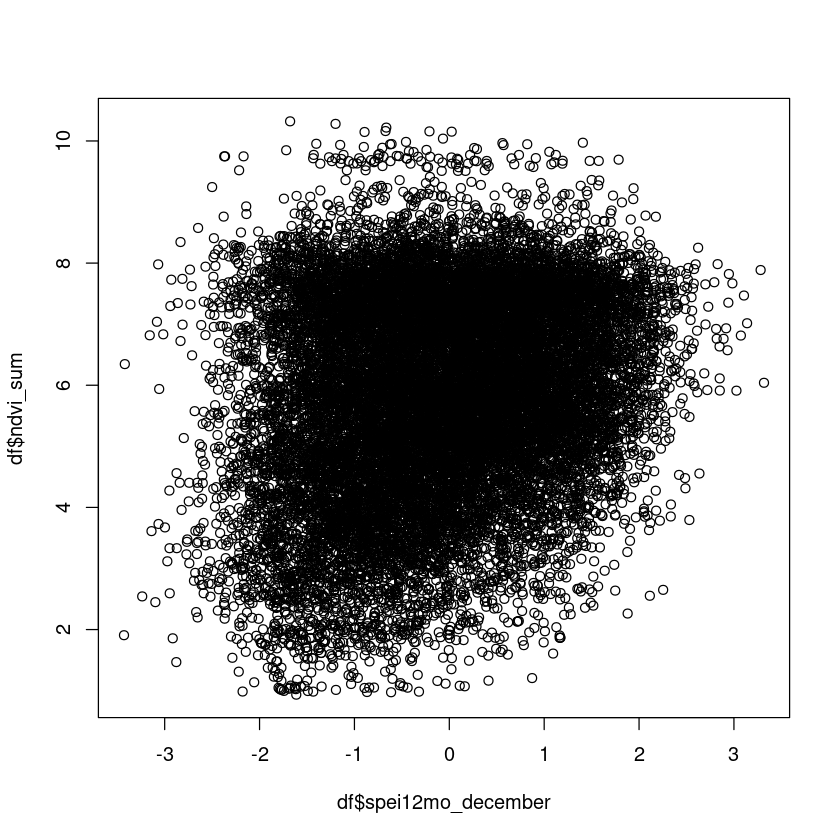

In [3]:
head(df)
plot(df$spei12mo_december, df$ndvi_sum)

## Best GPPint ~ Precip model

In [4]:
gppprcp_best <- lme(gpp_sum ~ prcp_sum, random=~1+prcp_sum|neonDomainName/stationid,
                           correlation=corAR1(),
                           data=df, na.action=na.omit)
summary(gppprcp_best)

Linear mixed-effects model fit by REML
 Data: df 
       AIC      BIC  logLik
  307672.1 307750.1 -153826

Random effects:
 Formula: ~1 + prcp_sum | neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev      Corr  
(Intercept) 6417.396600 (Intr)
prcp_sum       2.277649 -0.683

 Formula: ~1 + prcp_sum | stationid %in% neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev       Corr  
(Intercept) 2836.8845297 (Intr)
prcp_sum       0.8223364 -0.523
Residual    1040.5179602       

Correlation Structure: AR(1)
 Formula: ~1 | neonDomainName/stationid 
 Parameter estimate(s):
      Phi 
0.2334189 
Fixed effects: gpp_sum ~ prcp_sum 
               Value Std.Error    DF  t-value p-value
(Intercept) 13070.48 1563.3815 16911 8.360389       0
prcp_sum        2.85    0.5588 16911 5.100425       0
 Correlation: 
         (Intr)
prcp_sum -0.681

Standardized Within-Group Residuals:
         Min           

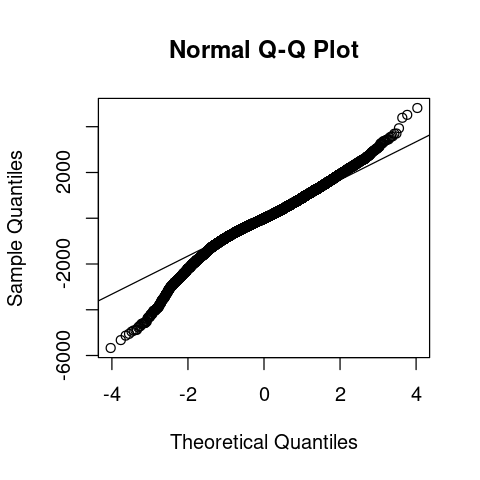

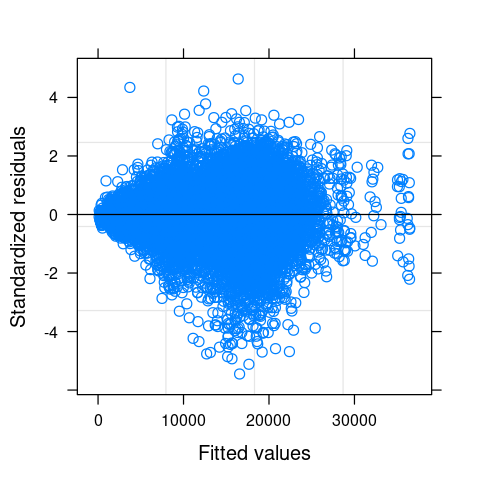

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(resid(gppprcp_best))
qqline(resid(gppprcp_best))
plot(gppprcp_best)

## Best summed zGPP ~ Precip model

In [6]:
# Change optimizer - not quite sure why this works better
ctrl <- lmeControl(opt='optim')

# (zndviprcp_AR_DomStaRand) zndvi_sum ~ prcp_sum, random slope and intercept by domain/stationid
zgppprcp_best <- lme(zgpp_sum ~ prcp_sum, random=~1+prcp_sum|neonDomainName/stationid,
                      correlation=corAR1(),
                      control=ctrl, 
                      data=df, na.action=na.omit)

summary(zgppprcp_best)

Linear mixed-effects model fit by REML
 Data: df 
       AIC      BIC    logLik
  66724.54 66802.59 -33352.27

Random effects:
 Formula: ~1 + prcp_sum | neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev      Corr  
(Intercept) 1.762965732 (Intr)
prcp_sum    0.004544073 -0.659

 Formula: ~1 + prcp_sum | stationid %in% neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev       Corr  
(Intercept) 0.6730912553 (Intr)
prcp_sum    0.0007176201 -0.781
Residual    1.5062902645       

Correlation Structure: AR(1)
 Formula: ~1 | neonDomainName/stationid 
 Parameter estimate(s):
      Phi 
0.2154003 
Fixed effects: zgpp_sum ~ prcp_sum 
                 Value Std.Error    DF   t-value p-value
(Intercept) -2.0999643 0.4359925 16911 -4.816515   0e+00
prcp_sum     0.0037909 0.0011058 16911  3.428373   6e-04
 Correlation: 
         (Intr)
prcp_sum -0.657

Standardized Within-Group Residuals:
        M

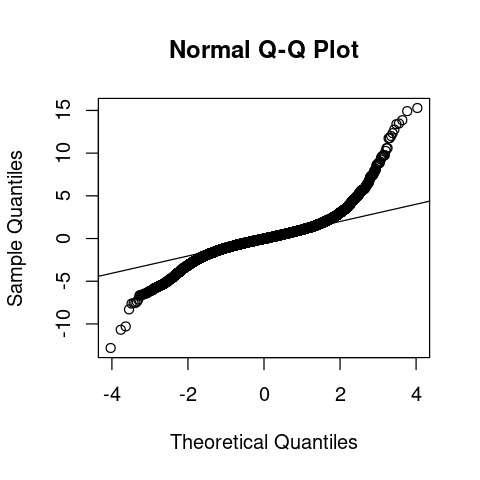

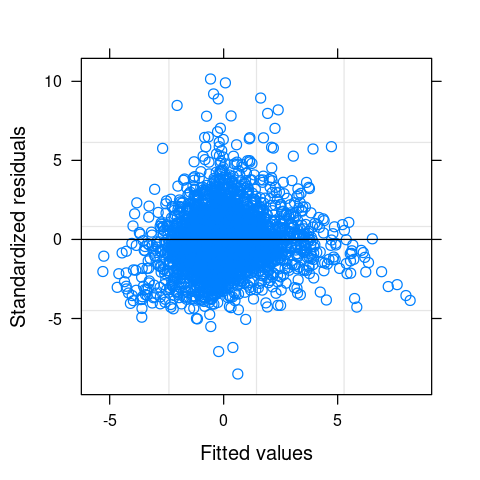

In [7]:
qqnorm(resid(zgppprcp_best))
qqline(resid(zgppprcp_best))
plot(zgppprcp_best)

## Best summed zGPP ~ Mean 12mon SPEI  model

In [8]:
# (zndvispei_AR_DomStaRand) zndvi_sum ~ spei12mo_mean, random slope and intercept by domain/stationid
zgppspei_best <- lme(zgpp_sum ~ spei12mo_mean, random=~1+spei12mo_mean|neonDomainName/stationid,
                            correlation=corAR1(),
                            control=ctrl, data=df, na.action=na.omit)

summary(zgppspei_best)

Linear mixed-effects model fit by REML
 Data: df 
      AIC      BIC   logLik
  61514.2 61592.25 -30747.1

Random effects:
 Formula: ~1 + spei12mo_mean | neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
              StdDev    Corr  
(Intercept)   0.7458533 (Intr)
spei12mo_mean 1.1084116 0.733 

 Formula: ~1 + spei12mo_mean | stationid %in% neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
              StdDev    Corr  
(Intercept)   0.2037834 (Intr)
spei12mo_mean 0.5097519 0.991 
Residual      1.2982769       

Correlation Structure: AR(1)
 Formula: ~1 | neonDomainName/stationid 
 Parameter estimate(s):
     Phi 
0.210101 
Fixed effects: zgpp_sum ~ spei12mo_mean 
                  Value Std.Error    DF  t-value p-value
(Intercept)   0.3883015 0.1822791 16911 2.130258  0.0332
spei12mo_mean 0.9504412 0.2705873 16911 3.512512  0.0004
 Correlation: 
              (Intr)
spei12mo_mean 0.73  

Standardized Within-Group Resid

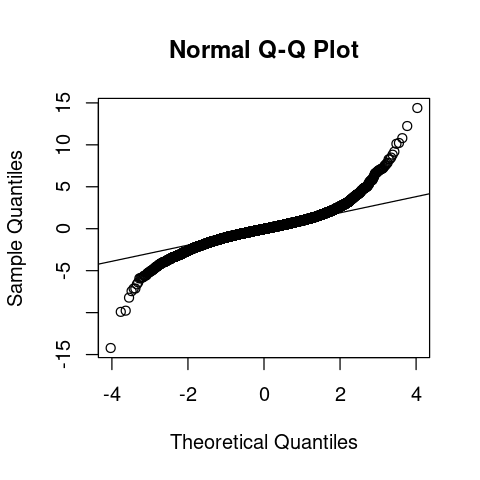

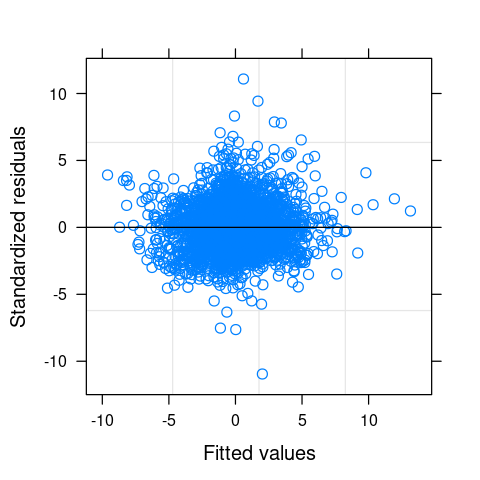

In [9]:
qqnorm(resid(zgppspei_best))
qqline(resid(zgppspei_best))
plot(zgppspei_best)

## Best NPP ~ precip model

In [10]:
nppprcp_best <- lme(npp_sum ~ prcp_sum, random=~1+prcp_sum|neonDomainName/stationid,
                           correlation=corAR1(),
                           data=df, na.action=na.omit)
summary(nppprcp_best)

Linear mixed-effects model fit by REML
 Data: df 
       AIC      BIC    logLik
  295955.3 296033.4 -147967.7

Random effects:
 Formula: ~1 + prcp_sum | neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev      Corr  
(Intercept) 3193.426431 (Intr)
prcp_sum       1.384881 -0.637

 Formula: ~1 + prcp_sum | stationid %in% neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev       Corr  
(Intercept) 1780.4965870 (Intr)
prcp_sum       0.4175851 -0.186
Residual     801.0696634       

Correlation Structure: AR(1)
 Formula: ~1 | neonDomainName/stationid 
 Parameter estimate(s):
      Phi 
0.3685223 
Fixed effects: npp_sum ~ prcp_sum 
               Value Std.Error    DF  t-value p-value
(Intercept) 6833.564  780.2535 16911 8.758133       0
prcp_sum       1.781    0.3407 16911 5.228281       0
 Correlation: 
         (Intr)
prcp_sum -0.634

Standardized Within-Group Residuals:
        Min        

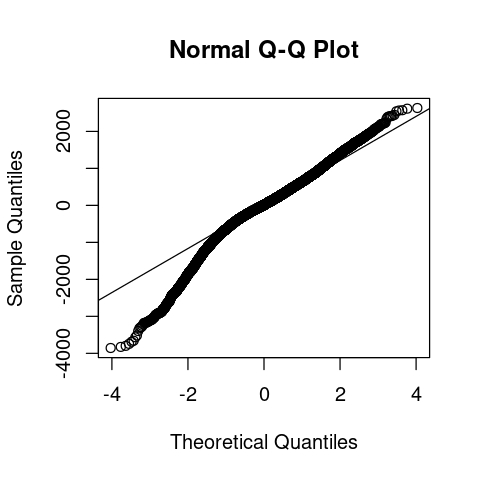

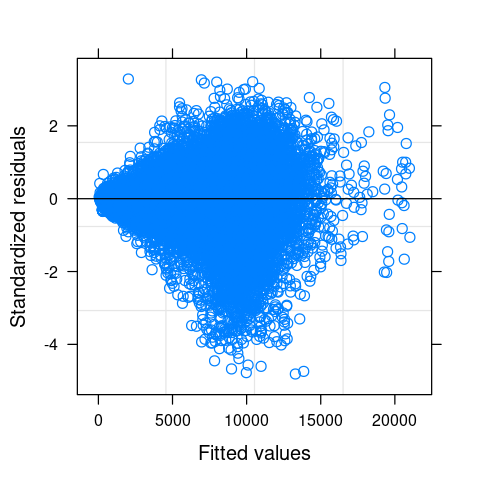

In [11]:
qqnorm(resid(nppprcp_best))
qqline(resid(nppprcp_best))
plot(nppprcp_best)

## Model for EVI response to precip

In [12]:
eviprcp_best <- lme(evi_sum ~ prcp_sum, random=~1+prcp_sum|neonDomainName/stationid,
                           correlation=corAR1(),
                           data=df, na.action=na.omit)
summary(eviprcp_best)

Linear mixed-effects model fit by REML
 Data: df 
       AIC      BIC    logLik
  11600.94 11678.98 -5790.468

Random effects:
 Formula: ~1 + prcp_sum | neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev       Corr  
(Intercept) 1.7515527368 (Intr)
prcp_sum    0.0005106413 -0.803

 Formula: ~1 + prcp_sum | stationid %in% neonDomainName
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev      Corr  
(Intercept) 0.987524926 (Intr)
prcp_sum    0.000301442 -0.374
Residual    0.281513779       

Correlation Structure: AR(1)
 Formula: ~1 | neonDomainName/stationid 
 Parameter estimate(s):
      Phi 
0.1509087 
Fixed effects: evi_sum ~ prcp_sum 
               Value Std.Error    DF   t-value p-value
(Intercept) 5.843846 0.4275454 16905 13.668362       0
prcp_sum    0.000513 0.0001263 16905  4.062473       0
 Correlation: 
         (Intr)
prcp_sum -0.794

Standardized Within-Group Residuals:
       Min       

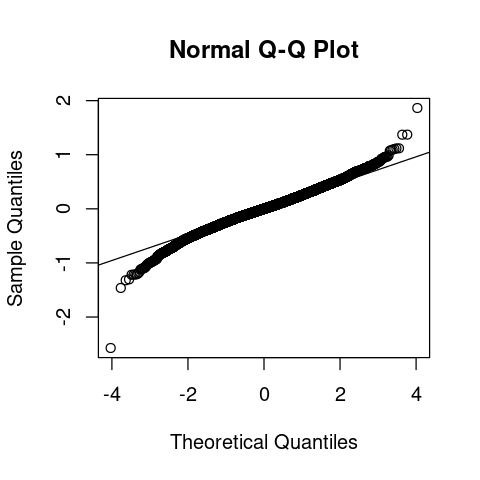

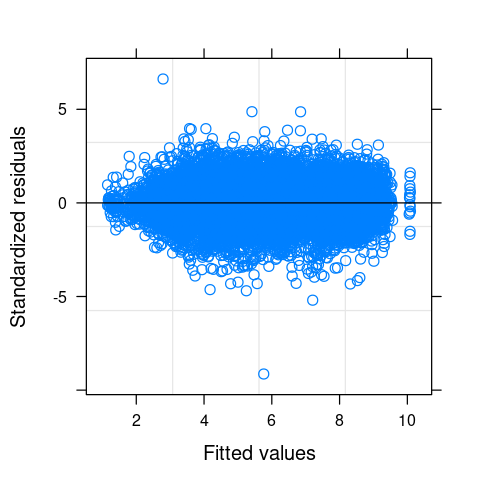

In [13]:
qqnorm(resid(eviprcp_best))
qqline(resid(eviprcp_best))
plot(eviprcp_best)

## Summarize and export eco-sensitivity models by domain

Models were selected using the best fits from MS2 (real model selection for GPP/NPP is yet to occur)

Below are tables of the fixed effects and neonDomain random effects for each sensitivity.



In [14]:
test <- fitted(nppprcp_best, level=2) + residuals(nppprcp_best, level=2)
# This gives a named vector, the next creates a named list
test.list <- split(unname(test),names(test))
testfun <- function(x) max(x) - min(x)
ranges <- lapply(test.list, testfun)
unlist(ranges)

Appalachians / Cumberland Plateau/USH00092475 
                                     3665.71335 
  Appalachians / Cumberland Plateau/USH00098740 
                                     3286.60040 
  Appalachians / Cumberland Plateau/USH00116446 
                                     3670.88302 
  Appalachians / Cumberland Plateau/USH00121030 
                                     2796.34649 
  Appalachians / Cumberland Plateau/USH00121425 
                                     2478.53058 
  Appalachians / Cumberland Plateau/USH00121747 
                                     2880.90253 
  Appalachians / Cumberland Plateau/USH00125237 
                                     2157.17493 
  Appalachians / Cumberland Plateau/USH00126001 
                                     3852.58375 
  Appalachians / Cumberland Plateau/USH00126705 
                                     3192.55233 
  Appalachians / Cumberland Plateau/USH00127125 
                                     3923.49875 
  Appalachians / Cumberland Plateau/USH00127755 
                                     2162.05643 
  Appalachians / Cumberland Plateau/USH00127875 
                                     2163.00205 
  Appalachians / Cumberland Plateau/USH00127935 
                                     2573.11927 
  Appalachians / Cumberland Plateau/USH00128036 
                                     3637.66758 
  Appalachians / Cumberland Plateau/USH00129080 
                                     2470.15126 
  Appalachians / Cumberland Plateau/USH00129113 
                                     4032.29703 
  Appalachians / Cumberland Plateau/USH00129253 
                                     3883.58425 
  Appalachians / Cumberland Plateau/USH00150254 
                                     2801.61901 
  Appalachians / Cumberland Plateau/USH00150381 
                                     2772.60971 
  Appalachians / Cumberland Plateau/USH00150619 
                                     2538.94622 
  Appalachians / Cumberland Plateau/USH00150909 
                                     3136.94822 
  Appalachians / Cumberland Plateau/USH00152791 
                                     2626.05759 
  Appalachians / Cumberland Plateau/USH00153028 
                                     2822.98177 
  Appalachians / Cumberland Plateau/USH00153430 
                                     2505.99940 
  Appalachians / Cumberland Plateau/USH00153762 
                                     3723.48114 
  Appalachians / Cumberland Plateau/USH00153994 
                                     3851.82757 
  Appalachians / Cumberland Plateau/USH00154703 
                                     2557.37305 
  Appalachians / Cumberland Plateau/USH00157324 
                                     2233.14787 
  Appalachians / Cumberland Plateau/USH00158709 
                                     3557.95045 
  Appalachians / Cumberland Plateau/USH00158714 
                                     2600.09835 
  Appalachians / Cumberland Plateau/USH00313976 
                                     1882.40271 
  Appalachians / Cumberland Plateau/USH00314055 
                                     1880.46247 
  Appalachians / Cumberland Plateau/USH00315356 
                                     2631.00761 
  Appalachians / Cumberland Plateau/USH00318694 
                                     1836.73210 
  Appalachians / Cumberland Plateau/USH00319147 
                                     2049.41455 
  Appalachians / Cumberland Plateau/USH00331592 
                                     2401.65666 
  Appalachians / Cumberland Plateau/USH00331890 
                                     2147.50635 
  Appalachians / Cumberland Plateau/USH00332119 
                                     2539.79749 
  Appalachians / Cumberland Plateau/USH00333758 
                                     2527.56890 
  Appalachians / Cumberland Plateau/USH00335041 
                                     2259.69308 
  Appalachians / Cumberland Plateau/USH00336600 
                                 

In [15]:

source('common_stats_functions.r')
# Get some mean annual statistics for domains (16year MAT/MAP)
gb_dom <- df %>% group_by(neonDomainName) %>%
            summarise(MAP=mean(prcp_sum, na.rm=TRUE),
                      MAT=mean(tavg_mean, na.rm=TRUE),
                      spei12mo_trend=mean(spei12mo_trend, na.rm=TRUE),
                      spei12mo_cv5yr_trend=mean(spei12mo_cv5yr_trend,na.rm=TRUE))

# Get some mean annual statistics for stationid (random effect, 16year MAT/MAP)
gb_sta <- df %>% group_by(stationid) %>%
            summarise(neonDomainName=unique(neonDomainName),
                      MAP=mean(prcp_sum, na.rm=TRUE),
                      MAT=mean(tavg_mean, na.rm=TRUE),
                      spei12mo_trend=mean(spei12mo_trend, na.rm=TRUE),
                      spei12mo_cv5yr_trend=mean(spei12mo_cv5yr_trend,na.rm=TRUE))

# This uses the function get_fe_2re to get fixed and random effects (and other stuff)
# out of the lme models. The function is in 'common_stats_functions'
gppprcp <- get_fe_2re(gppprcp_best, 'gpp_prcp', 'neonDomainName', 'stationid')
gppprcp_fe <- gppprcp[[1]]
gppprcp_re <- gppprcp[[2]]

nppprcp <- get_fe_2re(nppprcp_best, 'npp_prcp', 'neonDomainName', 'stationid')
nppprcp_fe <- nppprcp[[1]]
nppprcp_re <- nppprcp[[2]]

zgppprcp <- get_fe_2re(zgppprcp_best, 'zgpp_prcp', 'neonDomainName', 'stationid')
zgppprcp_fe <- zgppprcp[[1]]
zgppprcp_re <- zgppprcp[[2]]

zgppspei <- get_fe_2re(zgppspei_best, 'zgpp_spei', 'neonDomainName', 'stationid')
zgppspei_fe <- zgppspei[[1]]
zgppspei_re <- zgppspei[[2]]

eviprcp <- get_fe_2re(eviprcp_best, 'evi_prcp', 'neonDomainName', 'stationid')
eviprcp_fe <- eviprcp[[1]]
eviprcp_re <- eviprcp[[2]]

OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


In [16]:
#Join together 16yr domain stats, fixed and domain random effects for the 3 models
fe_dom_re <- list(gb_dom, eviprcp_fe, gppprcp_fe, nppprcp_fe, zgppprcp_fe, zgppspei_fe) %>%
        Reduce(function(df1,df2) full_join(df1,df2,by="neonDomainName"), .)
#Join together 16yr station stats, and station random effects for the 3 models
sta_re <- list(gb_sta, eviprcp_re, gppprcp_re, nppprcp_re, zgppprcp_re, zgppspei_re) %>%
        Reduce(function(df1,df2) left_join(df1,df2,by="stationid"), .)


fe_dom_re
head(sta_re)               

Warning message:
“Column `neonDomainName` joining factor and character vector, coercing into character vector”

neonDomainName,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,evi_prcp_Intcpt,evi_prcp_Slope,gpp_prcp_Intcpt,gpp_prcp_Slope,npp_prcp_Intcpt,npp_prcp_Slope,zgpp_prcp_Intcpt,zgpp_prcp_Slope,zgpp_spei_Intcpt,zgpp_spei_Slope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Appalachians / Cumberland Plateau,1229.8583,12.876123,2.640105e-04,-2.193997e-05,2.0169356,-2.822418e-04,4417.6651,-1.3454545,2336.7407,-0.59670678,0.7475984,-0.0026669085,-0.39557402,-0.68686112
Atlantic Neotropical,1502.0000,24.170295,-4.750003e-04,2.047066e-05,1.4152350,-2.378587e-04,13705.4905,-1.6810739,6435.4941,-0.82921718,-0.6546943,-0.0019728973,-0.26714221,-0.52867463
Central Plains,497.7514,12.285118,-9.022957e-05,2.109924e-05,-1.6449717,7.948178e-04,-6178.0311,4.8363779,-2945.8381,2.91946731,-2.3419216,0.0051692259,0.27684046,1.19974166
Desert Southwest,225.0551,19.144803,-8.694542e-04,1.476098e-04,-2.7190184,1.071633e-03,-9770.2240,1.3162260,-5350.5184,0.24346845,-1.9408106,0.0139183191,2.61480701,2.47333401
Great Basin,308.4206,9.069863,-3.262137e-04,6.795495e-05,-2.0612857,3.497405e-04,-6514.8178,0.4074555,-2962.4438,0.09811201,0.9735873,-0.0001414446,-0.06370068,-0.38293799
Great Lakes,878.7050,7.559194,1.855930e-04,-1.993492e-05,0.3108072,-4.264730e-04,2433.2942,-1.5195204,2308.1349,-0.74753118,1.4964157,-0.0030855614,-0.38781354,-0.95698936
Mid Atlantic,1157.1283,14.664712,-6.455362e-05,4.626216e-05,1.7284851,-2.316777e-04,4525.9663,-1.1465968,1593.9170,-0.42866376,0.1399547,-0.0020769996,-0.25955564,-0.48679836
Northeast,1145.8539,8.846465,2.156314e-04,-5.588769e-06,1.6864390,-6.965231e-04,3758.9037,-3.0256259,2832.9324,-1.98346634,2.2212106,-0.0038896132,-0.39667429,-0.89027662
Northern Plains,458.2536,6.910386,-1.160497e-05,2.478216e-05,-1.8555909,4.665564e-05,-5394.2816,3.4635931,-2258.4687,2.38093799,0.1558841,0.0004506826,-0.28748948,-0.09477334


stationid,neonDomainName,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,evi_prcp_randomIntcpt,evi_prcp_randomSlope,evi_prcp_yval_range,evi_prcp_rmse_raw,⋯,zgpp_prcp_yval_range,zgpp_prcp_rmse_raw,zgpp_prcp_rmse_ub,zgpp_prcp_nrmse_ub,zgpp_spei_randomIntcpt,zgpp_spei_randomSlope,zgpp_spei_yval_range,zgpp_spei_rmse_raw,zgpp_spei_rmse_ub,zgpp_spei_nrmse_ub
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,Southeast,1569.225,19.65286,4.948660e-04,-5.418599e-05,0.7890059,-4.922218e-05,0.7343424,0.2217927,⋯,5.662946,1.2080898,1.350686,0.2385129,-0.033864275,-0.08347707,5.662946,1.416254,1.583420,0.2796107
USH00012813,Southeast,1690.481,19.48766,2.871429e-04,1.828267e-05,0.8316867,2.138118e-06,0.5606316,0.1529761,⋯,3.953182,0.9735638,1.088477,0.2753421,-0.172894492,-0.43564299,3.953182,1.060249,1.185395,0.2998584
USH00013160,Ozarks Complex,1351.556,17.92505,2.030824e-04,-2.064144e-05,0.5040932,-7.218688e-05,0.6112931,0.1731744,⋯,5.349800,1.2896767,1.441902,0.2695246,0.005464518,0.01218256,5.349800,1.272698,1.422920,0.2659763
USH00013511,Ozarks Complex,1193.169,17.51344,-5.681463e-06,-1.147154e-05,0.9891229,7.759887e-05,0.6153652,0.2059843,⋯,7.695786,1.8827800,2.105012,0.2735279,-0.045372494,-0.12196562,7.695786,1.952674,2.183155,0.2836819
USH00013816,Southeast,1354.350,16.84411,3.157518e-04,-3.465651e-06,1.4768161,-2.854330e-04,0.5921338,0.1891790,⋯,7.056103,1.1879100,1.328124,0.1882234,0.034434122,0.08912397,7.056103,1.384107,1.547479,0.2193108
USH00015749,Ozarks Complex,1291.244,16.71458,4.272818e-04,1.449213e-06,-0.6677916,2.454184e-04,1.3736412,0.3494436,⋯,4.390213,1.1289325,1.262185,0.2874997,0.012067892,0.02994551,4.390213,1.042221,1.165238,0.2654173


In [17]:
# Add fixed effects and domain (random) to stationid random effects
station_fe_re <- sta_re
for (d in unique(sta_re$neonDomainName)){
    # Get fixed and random effect for evi~precip
    fe <- fe_dom_re[fe_dom_re$neonDomainName=='FixedEffects','evi_prcp_Slope'][[1]]
    re <- fe_dom_re[fe_dom_re$neonDomainName==d,'evi_prcp_Slope'][[1]]
    # Add to random effects of stations in domain d
    staix <- station_fe_re$neonDomainName==d
    station_fe_re$evi_prcp_randomSlope[staix] <- station_fe_re$evi_prcp_randomSlope[staix] + fe + re
    
    # Get fixed and random effect for gpp~precip
    fe <- fe_dom_re[fe_dom_re$neonDomainName=='FixedEffects','gpp_prcp_Slope'][[1]]
    re <- fe_dom_re[fe_dom_re$neonDomainName==d,'gpp_prcp_Slope'][[1]]
    # Add to random effects of stations in domain d
    staix <- station_fe_re$neonDomainName==d
    station_fe_re$gpp_prcp_randomSlope[staix] <- station_fe_re$gpp_prcp_randomSlope[staix] + fe + re
    
    # Get fixed and random effect for npp~precip
    fe <- fe_dom_re[fe_dom_re$neonDomainName=='FixedEffects','npp_prcp_Slope'][[1]]
    re <- fe_dom_re[fe_dom_re$neonDomainName==d,'npp_prcp_Slope'][[1]]
    # Add to random effects of stations in domain d
    station_fe_re$npp_prcp_randomSlope[staix] <- station_fe_re$npp_prcp_randomSlope[staix] + fe + re
    
    # Get fixed and random effect for zgpp~precip
    fe <- fe_dom_re[fe_dom_re$neonDomainName=='FixedEffects','zgpp_prcp_Slope'][[1]]
    re <- fe_dom_re[fe_dom_re$neonDomainName==d,'zgpp_prcp_Slope'][[1]]
    # Add to random effects of stations in domain d
    station_fe_re$zgpp_prcp_randomSlope[staix] <- station_fe_re$zgpp_prcp_randomSlope[staix] + fe + re
    
    # Get fixed and random effect for zgpp~spei
    fe <- fe_dom_re[fe_dom_re$neonDomainName=='FixedEffects','zgpp_spei_Slope'][[1]]
    re <- fe_dom_re[fe_dom_re$neonDomainName==d,'zgpp_spei_Slope'][[1]]
    # Add to random effects of stations in domain d
    station_fe_re$zgpp_spei_randomSlope[staix] <- station_fe_re$zgpp_spei_randomSlope[staix] + fe + re
}

In [18]:
# How many missing slopes are there?
print(paste(sum(is.na(station_fe_re$gpp_prcp_randomSlope)),
            'missing slopes'))
print(paste(dim(station_fe_re)[1] - sum(is.na(station_fe_re$gpp_prcp_randomSlope)),
            'good slopes'))

[1] "0 missing slopes"
[1] "1208 good slopes"


In [19]:
# Calculate mean annual precipitation, T, and spei slopes for 
# ALL years (full century, by station and domain)
dom_map <- df2 %>% group_by(neonDomainName) %>% summarise(MAPdom=mean(prcp_sum),
                                                          MATdom=mean(tavg_mean),
                                                          spei12mo_trend_all=mean(spei12mo_trend),
                                                          spei12mo_cv5yr_trend_all=mean(spei12mo_cv5yr_trend))
dom_map
sta_map <- df2 %>% group_by(stationid) %>% summarise(MAPsta=mean(prcp_sum),
                                                          MATsta=mean(tavg_mean),
                                                          spei12mo_trend_all=mean(spei12mo_trend),
                                                          spei12mo_cv5yr_trend_all=mean(spei12mo_cv5yr_trend))
head(sta_map)

neonDomainName,MAPdom,MATdom,spei12mo_trend_all,spei12mo_cv5yr_trend_all
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Appalachians / Cumberland Plateau,1169.2229,12.564964,2.643023e-04,-2.199088e-05
Atlantic Neotropical,1491.3328,23.380670,-4.803523e-04,2.114857e-05
Central Plains,494.1643,11.554669,-9.058289e-05,2.109136e-05
Desert Southwest,245.7367,18.052197,-8.690439e-04,1.473590e-04
Great Basin,320.9593,8.297809,-3.250286e-04,6.755575e-05
Great Lakes,816.6060,6.732131,1.860428e-04,-2.004108e-05
Mid Atlantic,1140.3229,14.047997,-6.463262e-05,4.630339e-05
Northeast,1035.8177,7.976203,2.148902e-04,-5.628789e-06
Northern Plains,438.3639,6.080188,-9.386881e-06,2.440232e-05


stationid,MAPsta,MATsta,spei12mo_trend_all,spei12mo_cv5yr_trend_all
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,1573.777,19.79029,4.948660e-04,-5.418599e-05
USH00012813,1648.008,19.23061,2.871429e-04,1.828267e-05
USH00013160,1386.659,17.73815,2.030824e-04,-2.064144e-05
USH00013511,1322.446,16.96937,-5.681463e-06,-1.147154e-05
USH00013816,1357.113,16.82745,3.157518e-04,-3.465651e-06
USH00015749,1263.635,16.07114,4.272818e-04,1.449213e-06


In [20]:
# Add domain MAPdom and reorder the neonDomainName factor using it
station_fe_re <- merge(station_fe_re, dom_map, by='neonDomainName', all=TRUE)
station_fe_re <- transform(station_fe_re, neonDomainName=reorder(neonDomainName, MAPdom))
# Remove the domain MAPall
#station_fe_re$MAPall <- NULL
# Add station MAP
station_fe_re <- merge(station_fe_re, sta_map, by='stationid', all=TRUE)

# Same for fe_dom_re (just use domain MAP though)
fe_dom_re <- merge(fe_dom_re, dom_map, by='neonDomainName', all=TRUE)
fe_dom_re <- transform(fe_dom_re, neonDomainName=reorder(neonDomainName, MAPdom))

# Export fixed effects and domain_random
write_csv(fe_dom_re, paste0(dn_path, 'sensitivity_analysis/fixed_randomDomain_effects_MODIS.csv'))
write_csv(station_fe_re, paste0(dn_path, 'sensitivity_analysis/randomStation_summedeffects_MODIS.csv'))